# FIT9136 - Week 9 Applied Session

## Table of Contents:

1. [*Exercise 1: REVISIT REGEX](#exercise-1)
2. [*Exercise 2: Working with Pandas](#exercise-2)
3. [*Exercise 3: Numpy and Matplotlib](#exercise-3)
4. [Exercise 4: Star_Wars_Survey](#exercise-4)

### *Exercise 1:  REVISIT REGEX<a class="anchor" id="exercise-1"></a>
#regex #regular-expression

<div class="alert alert-block alert-success">

    
Let's us revise the regex and try it out on this question.    
    
    
**Write a Python code to replace all emojis(starting with `"("` and ending with `")"`) with `"[emoji]"` in the following text record.**
        
    
</div>

In [0]:
import re
text_rec = """
A: Congratulations!(＾∇＾)(｡ì _ í｡) You've won a $1,000 Walmart gift card. Go to http://bit.ly/d3FJe1 to claim now.
B: I am good. Nice try!(^_^)
C: Your tax refund is pending acceptance.(>.<) Must accept within 24 hours: http://bit.ly/fIhE3W16432
B: Why is everyone trying to scam me!! (///▽///)
"""

pattern = r"" # search for characters after each '(' until reaching the first ')'
repl = ''

### *Exercise 2:  Working with Pandas<a class="anchor" id="exercise-2"></a>


<div class="alert alert-block alert-success">

<blockquote>
pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. - <a href='https://pandas.pydata.org/docs/index.html'>Pandas official site</a>
</blockquote>    
    
    
<br>    
<br>    
Firstly, let's load the data about of the height, weight, and gender of the person (i.e. the `height_weight.csv` file), assign to a variable named `df`, and show the data frame contains the information using print: 

    
<br>

* [Data File](https://lms.monash.edu/mod/folder/view.php?id=10258774)
</div> 

In [0]:
# Your code here...


#### Slicing with ``.loc`` and ``.iloc``

Selecting particular rows and columns from a DataFrame is referred to as "slicing". We can use ``.loc[index_label, column_label]`` to slice by label:

In [0]:
# Row 2, "height" column


In [0]:
# All rows from 1 to 3, and the "height" column


In [0]:
# Last rows from the 2nd row (i.e. "2:" means from the 2nd row until the last row), all columns


In [0]:
# Select only the initial rows up to the 3rd row, and the "name" and "weight" columns


#### Modifying the index

Recall that we can select rows corresponding to a given person using:

In [0]:
df[df['name'] == 'Dinesh']

However, we can change the index to one of the columns in the DataFrame:

In [0]:
df.set_index('name', inplace=True)
display(df)

This might be a more suitable index for this particular dataset. The ``.loc`` indexing would now be performed by name:

In [0]:
# This line no longer works
df.loc[2, 'height']  # Change this line to work with the new index

Note that the new index makes it a little simpler to obtain each person's data, as the syntax is a little more concise:

In [0]:
df.loc['Dinesh']

However, if we want to slice by position, we now have to use ``.iloc[position]`` to do so:

In [0]:
# 0th row, all columns


In [0]:
# Initial rows up to 1st row, and the "height" column (which is now the 0th column)


In [0]:
# All rows, all columns


Note that the above line is equivalent to the following:

In [0]:
# All rows, all columns


We can also reset the index to an auto-incrementing number:

#### Adding and altering columns

We can add a column to a DataFrame like so:

In [0]:
df['age'] = [39, 43, 68, 20, 72]

print(df)

Now use the cell below to create a new column called ``last_name`` which contains each person's last name (just make up some last names).

In [0]:
#Your code here...


Note that we can change column names using the ``.rename()`` , method:

In [0]:
df = df.rename(columns={'name': 'first_name',
                   'height': 'height (cm)',
                   'weight': 'weight (kg)'})

In [0]:
df.columns

We can also combine data from different columns into a new column. For example, let's create a new column for the full name of each person in the table:

Note that the new ``full_name`` column does not contain any whitespace between the two names, because we simply concatenated the two columns using the ``+`` operator. See if you can re-create the ``full_name`` column in the code cell below, but this time include a single whitespace character between the two names:

You can also use the ``.apply()`` method to apply a function to all entries in a column.

In [0]:
# Create new column containing number of characters in each person's full_name


This applies the inbuilt Python function ``len()`` to each ``full_name`` entry, and assigns the returned Series to a new column.

<div class="alert alert-block alert-warning">

    
##### Challenge

Now, in the below cell, use the ``.apply()`` method together with the ``upper()`` function to print the ``'first_name'`` column in upper case letters. Note that you will need to pass a lambda function to the ``.apply()`` method:
    
    
</div>

Now again print the ``'first_name'`` column in upper case letters, but this time use the ``.str.upper()`` method:

Note that there are several ``.str.<method_name>()`` methods that are useful for manipulating string (object) columns in Pandas DataFrames. For example, try using the ``.str.contains()`` method to check whether each string in the ``'first_name'`` column contains a sub-string of your choice:

Now use the above condition to query the ``df`` DataFrame (i.e. print the associated rows that satisfy the above query):

Now create a new column called ``year_of_birth`` containing each person's year of birth, which can be inferred from their current age:

##### Merging DataFrames

We can join different datasets together in Pandas using ``pd.merge()``.

To provide an example of this, there should be a CSV file named "income.csv" in the same folder as this notebook, which contains the income for some of the people present in the above DataFrame ``df``.

Let's first import the data from "income.csv" into a new DataFrame called ``income``:

In [0]:
# Your code here...


We can now join this income data to our previous dataframe:

In [0]:
# This joins "df" to "income" by matching the "first_name" column


In [0]:
merged

Note that only the two people that are present in both ``df`` and ``income`` appear in the resulting ``merged`` dataframe. This is because the default join type in ``pd.merge()`` is an INNER join. Here is a diagram showing how different join methods work when joining two tables (called "zoo" and "zoo_eats"):

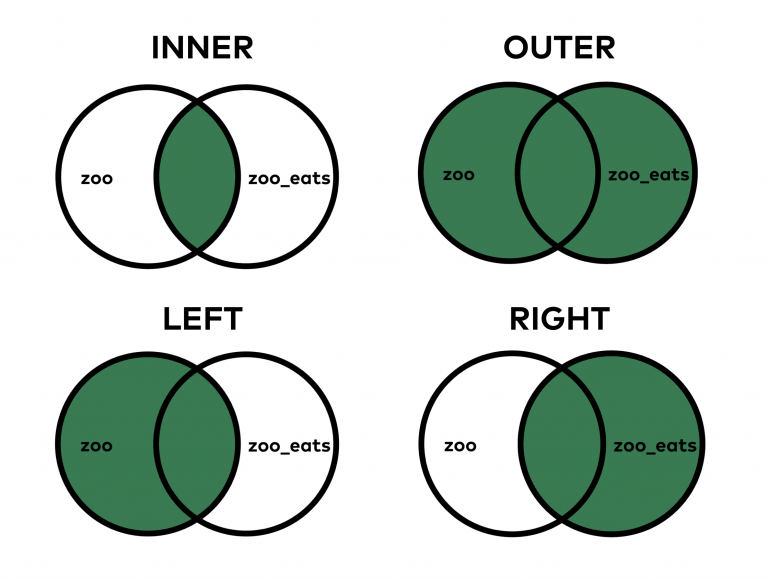

Image credit: https://data36.com/pandas-tutorial-3-important-data-formatting-methods-merge-sort-reset_index-fillna/

For example, a table produced by an INNER join will only have rows where values in the joining columns are present in both tables, whereas a table produced by a LEFT join will keep all rows of the left table.

We can change the join type to a LEFT join by specifying the ``how`` option when calling ``pd.merge()``:

This keeps all of the rows in the left table (``df``) and fills all missing data in the new column with ``NaN``s.

Note that if the column names that we want to join on are different, we can specify this when calling ``pd.merge()``. For example, let's take in some data of whether or not people have a PhD:

and merge it with the rest of the data:

<div class="alert alert-block alert-warning">

##### Challenge

A person's Body Mass Index (BMI) can be calculated using the equation:

$BMI = {w \over h^2}$

where $w$ = *weight (kg)* and $h$ = *height (m)*. Since the height must be in units of metres, not centimetres, we first need to create a new column which contains the height converted to metres.

Now see if you can create a new column for the height in units of metres (rather than centimetres), and use it to calculate the BMI:
    
</div>

Now join the ``df`` table with the ``income`` and ``phd`` tables, so that all of the data we have on the above five people is stored in a single table:

### *Exercise 3:  Numpy and Matplotlib<a class="anchor" id="exercise-3"></a>

<div class="alert alert-block alert-success">

<blockquote>
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. - <a href='https://matplotlib.org/stable/index.html'>Matplotlib official site</a>
</blockquote>
   
<blockquote>
The fundamental package for scientific computing with Python - <a href='https://numpy.org/'>Numpy official site</a>
</blockquote>    
    
    
<br>    
       
Using `matplotlib` and `numpy`, create a `scatter-plot` for the following functions over a range of -10 to 10 (for a challenge, plot them in the same window):
- y = x+2
- y = x^2
- y = x^3
 
<br>     
There are two parts:

* **Part-1:** Plot the 3 x-y relationships on the same graph
* **Part-2:** Plot them on separate subplots    
    
    
</div>

In [0]:
import matplotlib.pyplot as plt
import numpy as np

### Exercise 4:  Star_Wars_Survey<a class="anchor" id="exercise-3"></a>

<div class="alert alert-block alert-success">

Let's try loading a dataset in which 1,187 people were surveyed about the Star Wars movies. 

You might find that the an error ``"UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 62: invalid start byte"`` while you read the data. This is due to a string character encoding issue. Strings are collections of characters, and characters are always encoded using a particular character encoding standard (e.g. ASCII, UTF-8, etc...). If you are interested in learning more about character encodings, this blog post is a good place to start:

https://medium.com/@apiltamang/unicode-utf-8-and-ascii-encodings-made-easy-5bfbe3a1c45a

In our case, ``read_csv`` did not automatically identify the encoding of the CSV file. If we Google the above error one of the first results is a Stack Overflow thread which indicates "ISO-8859-1" may be the correct encoding.

You can see there are a lot of NaN values in the dataset, particularly for some columns.

Write some code that creates a new column in the ``survey`` DataFrame called ``"nans"``. The column should contain a count of all NaN values in each row. If you don't know the commands to use, don't be afraid to google the task, because the Stack Exchange website will usually have good solutions to common coding tasks (not necessarily in the top reply or most up-voted reply).

Then use ``.value_counts()`` to look at the distribution of different NaN counts.

Now use the Series ``.hist()`` method to plot a histogram of the NaN counts column. To view the histogram in PyCharm, you may need to import plyplot using ``import matplotlib.pyplot as plt``, then show the plot using ``plt.show()``.

Are there rows which have many more NaNs than other rows? If so, examine those rows more closely -- do you think they should be removed from the analysis?

Now drop all rows with a NaN count above a threshold number (just pick a reasonable threshold value that you think is justifiable).
    
</div>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt